In [10]:
import pandas as pd
import pvtools.pv_curve as pvc
import matplotlib.pyplot as plt
import statsmodels.api as sm


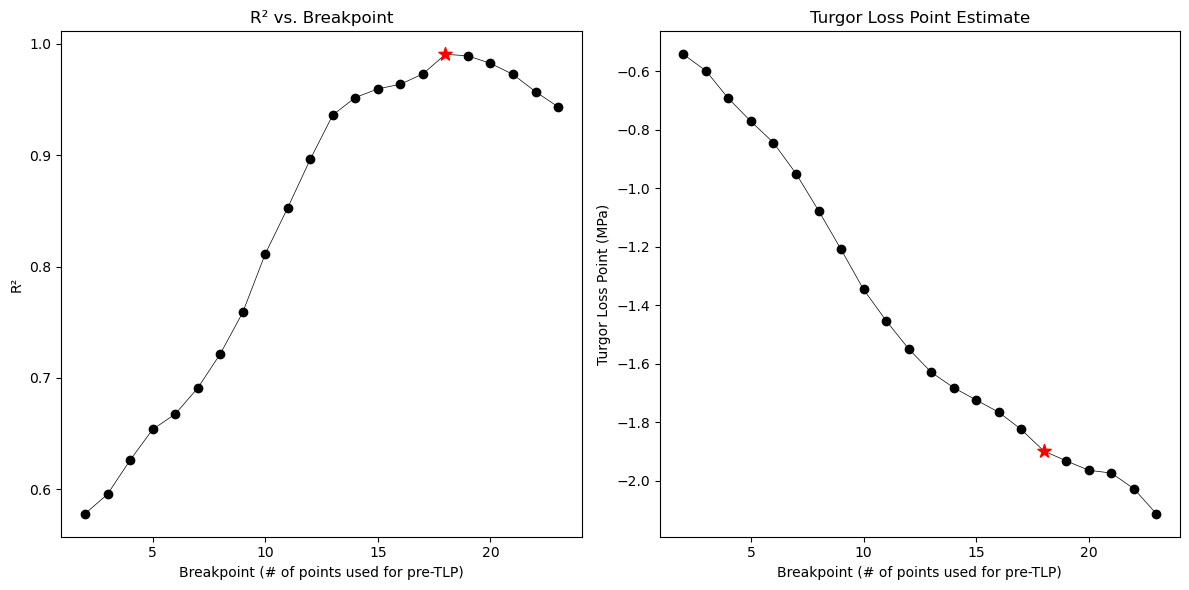

INFO:root:Breakpoint found at index 18 with R² of 0.991
INFO:root:Breakpoint found at index 18 with R² of 0.991


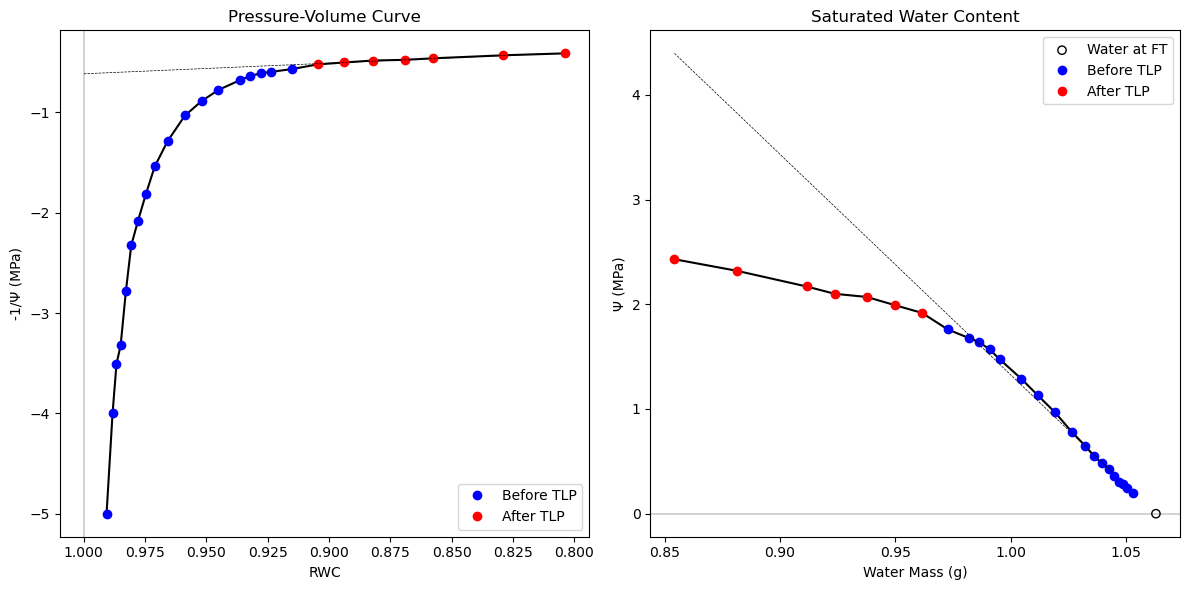

In [2]:
# this is data I collected for a eucalyptus globulus on UCSB's campus
data = pd.read_excel('eugl_1.xlsx')
psis = data['Y (Mpa)'].dropna().values
masses = data['Mass (g)'].dropna().values
dry_mass = data['Dry Weight (g)'][0]

pvc.get_breakpoint(psis, masses, dry_mass, plot=True)

pv_curve = pvc.PVCurve(psis, masses, dry_mass)
pv_curve.plot()

In [29]:
bkp = pv_curve.bkp


x = masses[:bkp]
x = sm.add_constant(x)
y = psis[:bkp]
model = sm.OLS(y, x).fit()
y_hat = model.get_prediction(x).summary_frame(alpha=0.005)
outliers = y[(y_hat['mean_ci_lower'] > y) | (y_hat['mean_ci_upper'] < y)]
outliers_idx = [i for i, val in enumerate(y) if val in outliers]
print(outliers_idx)

# reg1 = sm.OLS(psis[:bkp], masses[:bkp]).fit()
# y_hat1 = reg1.predict(masses[:bkp])
# (y_hat1['mean_ci_lower'] > psis[:bkp])
# # outliers1 = psis[:bkp][(y_hat1['mean_ci_lower'] > psis[:bkp]) | (y_hat1['mean_ci_upper'] < psis[:bkp])]
# print(outliers1)

# fig, ax = plt.subplots()
# ax.plot(masses, psis, 'o')
# ax.plot(masses[:bkp], psis[:bkp], 'o')
# ax.plot(masses[bkp:], psis[bkp:], 'o')

# # plot confidence intervals
# x = masses[:bkp]
# x = sm.add_constant(x)
# y = psis[:bkp]
# model = sm.OLS(y, x).fit()
# y_hat = model.predict(x)
# y_hat = model.get_prediction(x).summary_frame(alpha=0.005)
# ax.plot(masses[:bkp], y_hat['mean'], 'k')
# ax.fill_between(masses[:bkp], y_hat['mean_ci_lower'], y_hat['mean_ci_upper'], color='k', alpha=0.2)

# # get indices of points that fall outside of the confidence interval
# outliers = y[(y_hat['mean_ci_lower'] > y) | (y_hat['mean_ci_upper'] < y)]
# outliers_idx = [i for i, val in enumerate(y) if val in outliers]
# outliers_idx

# # plt.show()

[10, 11, 12, 17]
